In [102]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.backend import clear_session
import matplotlib.pyplot as plt
from keras.optimizers import SGD, RMSprop, Adam, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.losses import SparseCategoricalCrossentropy
from keras.metrics import SparseCategoricalAccuracy
optimizers = [SGD, RMSprop, Adam, Adadelta, Adagrad, Adamax, Nadam, Ftrl]
activators = ['relu', 'sigmoid', 'softmax', 'softplus', 'softsign', 'tanh', 'selu', 'elu', 'exponential']
from keras.datasets import mnist

## nn_0

<Axes: xlabel='X1', ylabel='X2'>

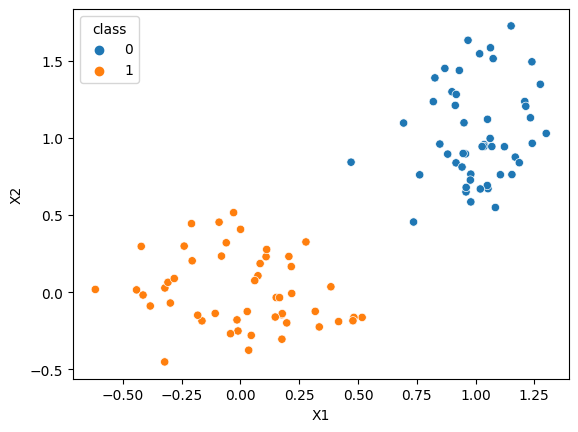

In [3]:
nn_0_df = pd.read_csv('data/nn_0.csv').replace({-1: 0})
sns.scatterplot(nn_0_df, x='X1', y='X2', hue='class')

In [4]:
x_train, x_test, y_train, y_test = train_test_split(nn_0_df.loc[:,['X1', 'X2']], nn_0_df['class'], train_size=0.8)

In [5]:
accuracy_dict = {}
for optimizer in optimizers:
    accuracy_dict[optimizer()._name] = pd.DataFrame()
    for activator in activators:
        clear_session()
        model = Sequential()
        model.add(Dense(1, input_dim=2, activation=activator))
        model.compile(optimizer=optimizer(learning_rate=0.05), loss='binary_crossentropy', metrics=['accuracy'])
        hist = model.fit(x_train, y_train, epochs=200, validation_data=(x_test, y_test),batch_size=101, verbose=0)
        accuracy_dict[optimizer()._name][activator] = hist.history['accuracy']

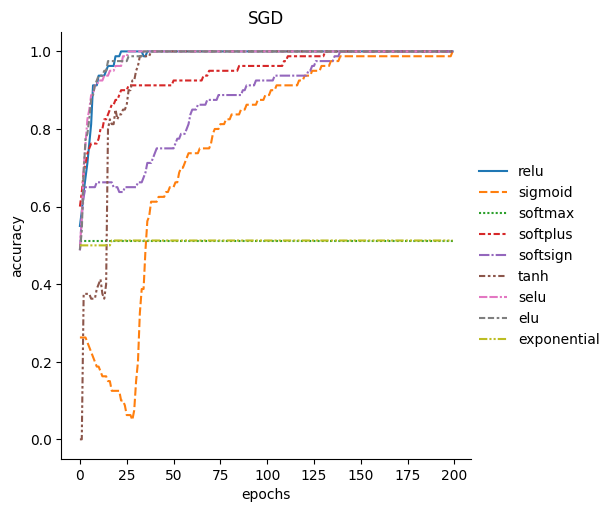

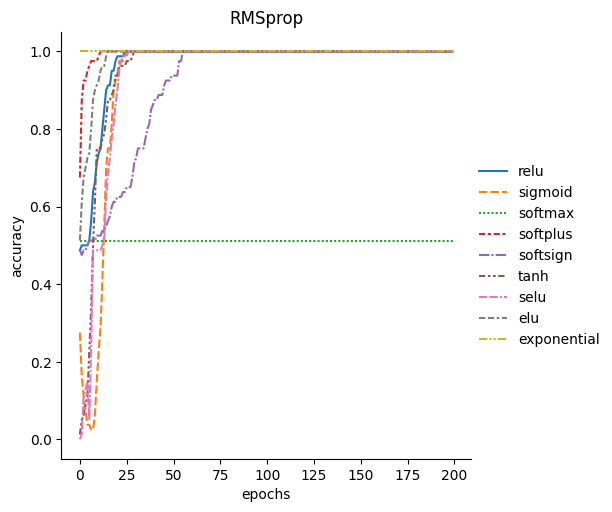

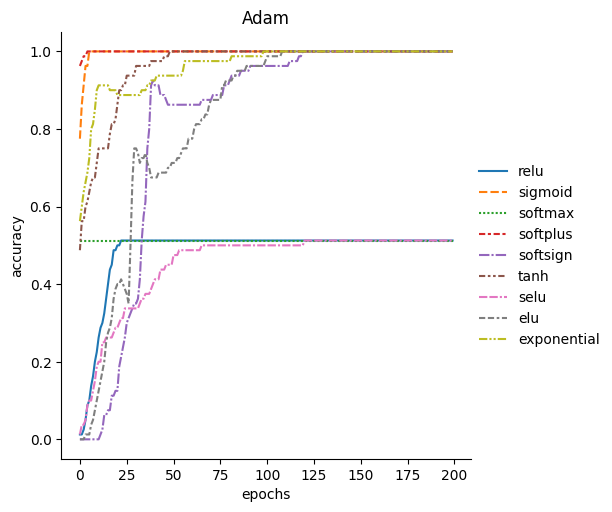

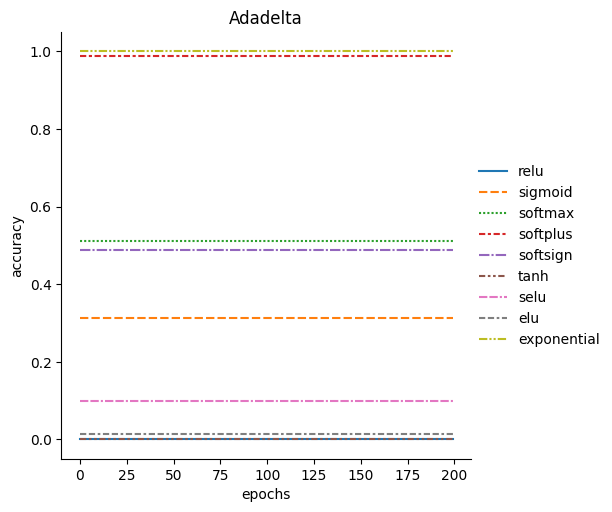

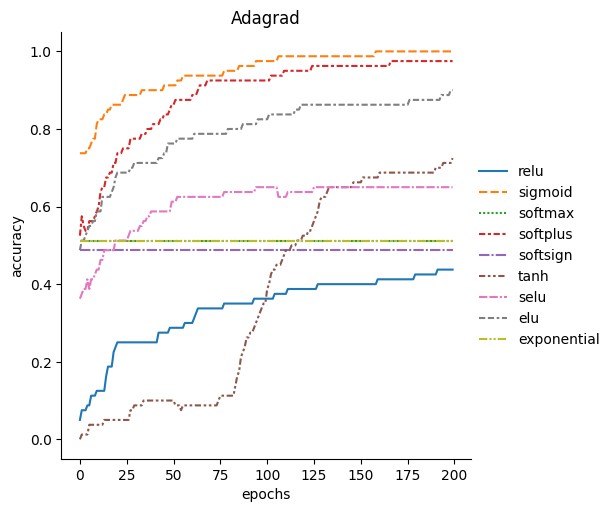

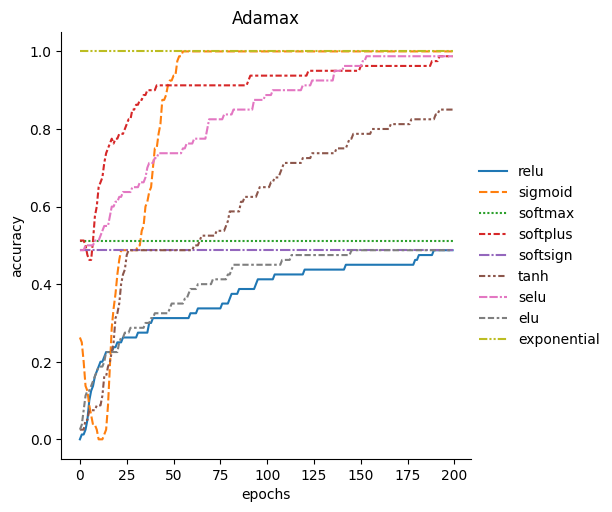

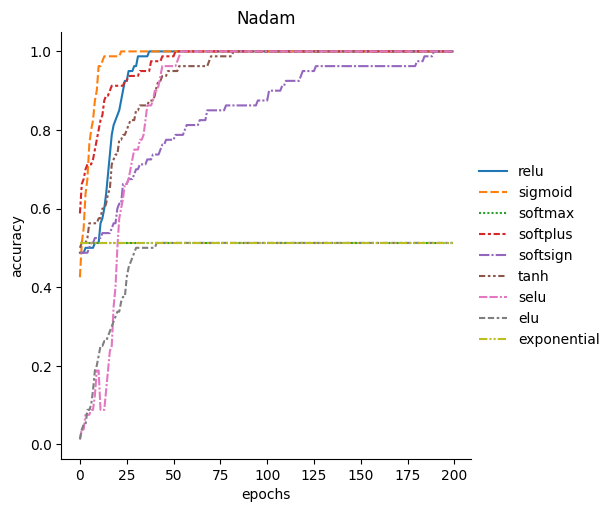

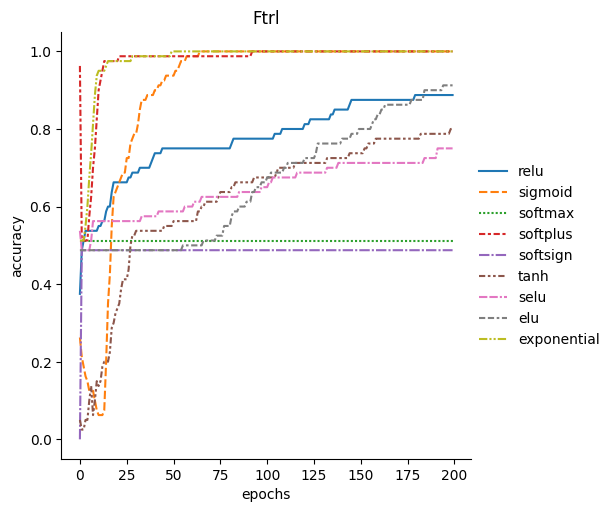

In [30]:
for optimizer, df in accuracy_dict.items():
    ax = sns.relplot(df, kind="line")
    ax.set(xlabel='epochs', ylabel='accuracy', title=optimizer)

<Axes: xlabel='X1', ylabel='X2'>

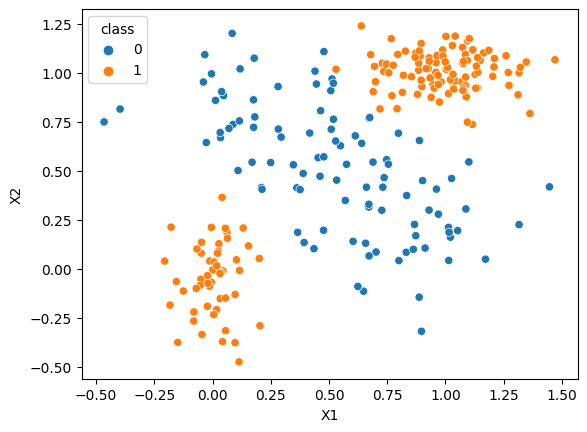

In [32]:
nn_1_df = pd.read_csv('data/nn_1.csv').replace({-1: 0})
sns.scatterplot(nn_1_df, x='X1', y='X2', hue='class')

In [33]:
x_train, x_test, y_train, y_test = train_test_split(nn_1_df.loc[:,['X1', 'X2']], nn_1_df['class'], train_size=0.8)

In [34]:
accuracy_dict = {}
for optimizer in optimizers:
    accuracy_dict[optimizer()._name] = pd.DataFrame()
    for activator in activators:
        clear_session()
        model = Sequential()
        model.add(Dense(1, input_dim=2, activation=activator))
        model.compile(optimizer=optimizer(learning_rate=0.05), loss='binary_crossentropy', metrics=['accuracy'])
        hist = model.fit(x_train, y_train, epochs=200, validation_data=(x_test, y_test),batch_size=101, verbose=0)
        accuracy_dict[optimizer()._name][activator] = hist.history['accuracy']

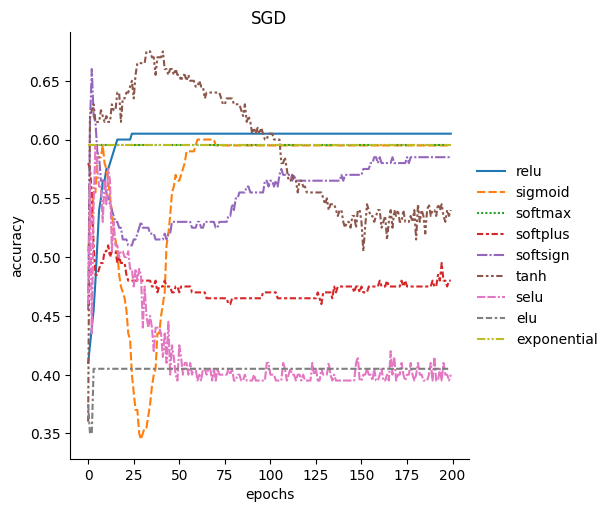

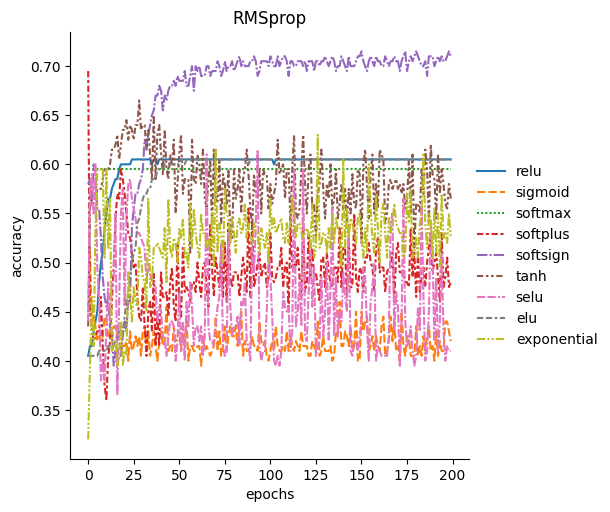

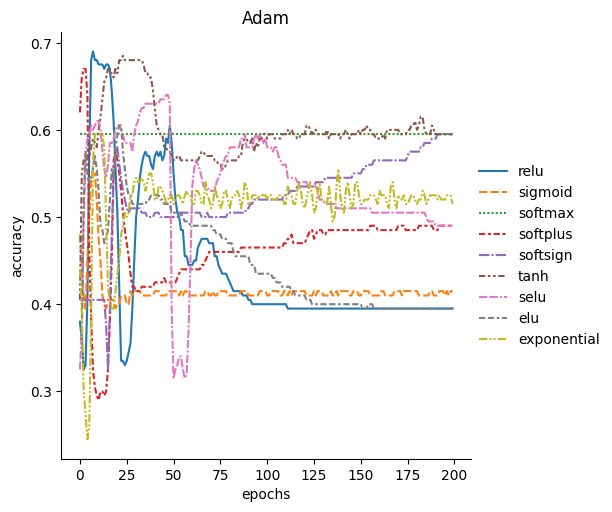

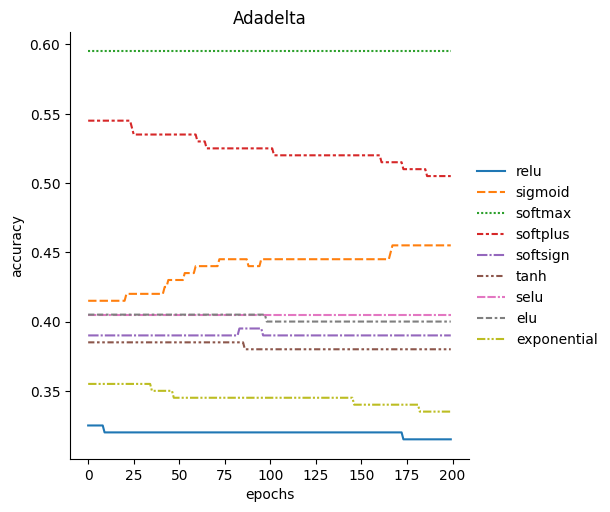

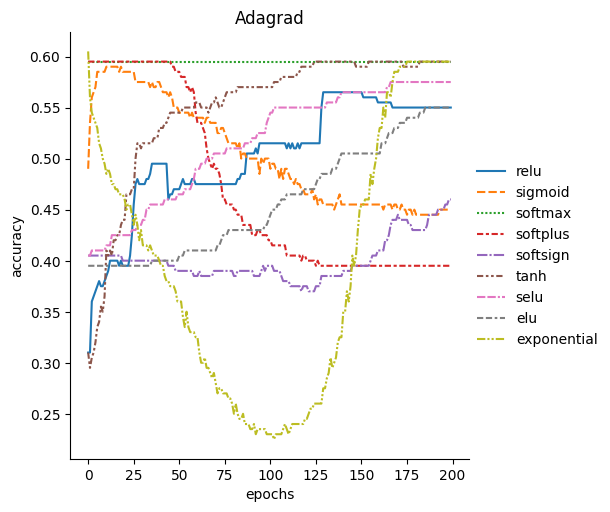

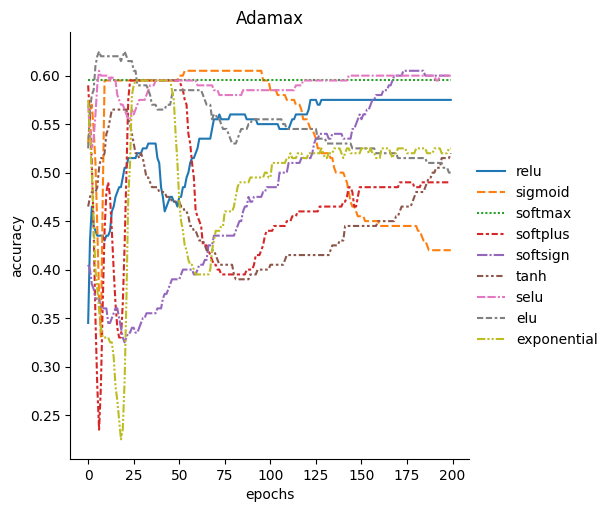

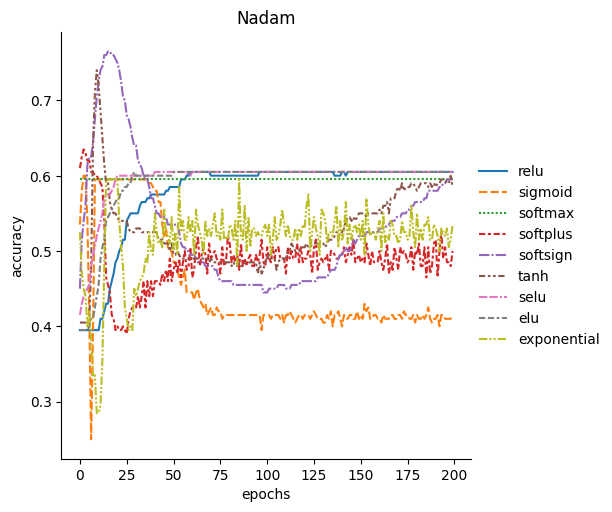

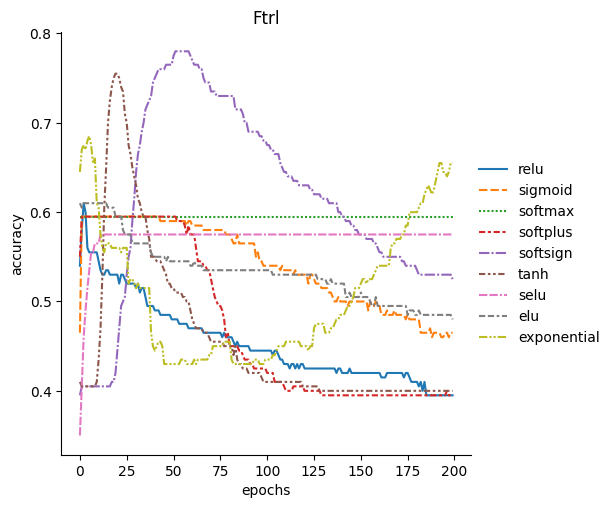

In [35]:
for optimizer, df in accuracy_dict.items():
    ax = sns.relplot(df, kind="line")
    ax.set(xlabel='epochs', ylabel='accuracy', title=optimizer)

## task_2

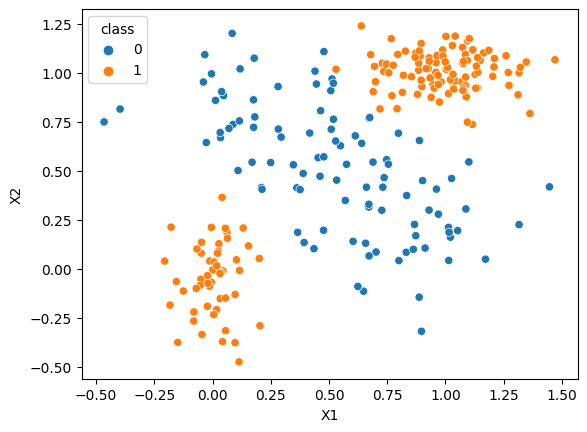

In [36]:
nn_1_df = pd.read_csv('data/nn_1.csv').replace({-1: 0})
sns.scatterplot(nn_1_df, x='X1', y='X2', hue='class')
x_train, x_test, y_train, y_test = train_test_split(nn_1_df.loc[:,['X1', 'X2']], nn_1_df['class'], train_size=0.8)

In [49]:
clear_session()
model = Sequential([
    Dense(2, input_dim=2, activation="sigmoid"),
    Dense(1, activation="sigmoid")
])
model.compile(loss='mean_squared_error', optimizer=Nadam(learning_rate=0.05), metrics=['accuracy'])
hist = model.fit(x_train, y_train, epochs=200, validation_data=(x_test, y_test),batch_size=101, verbose=0)

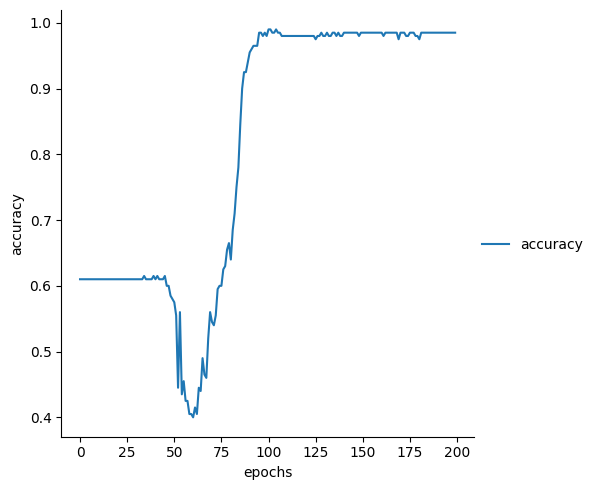

In [65]:
ax = sns.relplot(pd.DataFrame(hist.history['accuracy'], columns=['accuracy']), kind='line')
ax.set(xlabel='epochs', ylabel='accuracy')

In [59]:
nn_1_df['pred'] = model.predict((nn_1_df.loc[:,['X1', 'X2']]))

8/8 [==============================] - 0s 873us/step


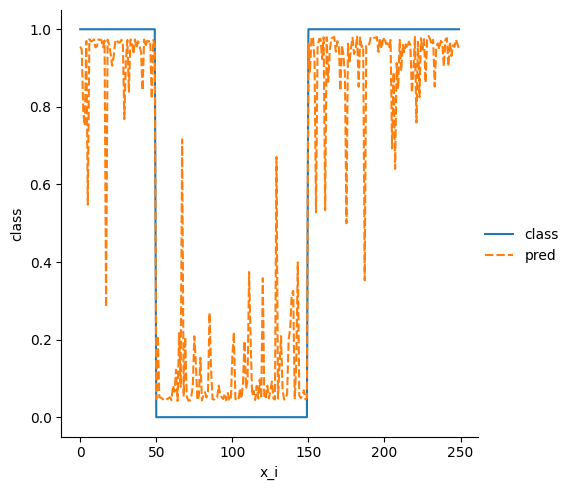

In [70]:
ax = sns.relplot(nn_1_df.loc[:,['class', 'pred']], kind='line')
ax.set(xlabel='x_i', ylabel='class')

## MNIST

In [83]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [108]:
clear_session()
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(64, activation='relu'),
    Dense(10)
])
model.compile(
    optimizer=Adam(0.001),
    loss=SparseCategoricalCrossentropy(from_logits=True),
    metrics=[SparseCategoricalAccuracy()],
)
hist = model.fit(x_train, y_train, epochs=15, validation_data=(x_test, y_test))
accuracy = hist.history['sparse_categorical_accuracy']

Epoch 1/15
1875/1875 [==============================] - 2s 987us/step - loss: 1.9382 - sparse_categorical_accuracy: 0.7642 - val_loss: 0.6118 - val_sparse_categorical_accuracy: 0.8586
Epoch 2/15
1875/1875 [==============================] - 2s 927us/step - loss: 0.4671 - sparse_categorical_accuracy: 0.8809 - val_loss: 0.4215 - val_sparse_categorical_accuracy: 0.8920
Epoch 3/15
1875/1875 [==============================] - 2s 933us/step - loss: 0.3322 - sparse_categorical_accuracy: 0.9117 - val_loss: 0.3281 - val_sparse_categorical_accuracy: 0.9191
Epoch 4/15
1875/1875 [==============================] - 2s 952us/step - loss: 0.2788 - sparse_categorical_accuracy: 0.9246 - val_loss: 0.3486 - val_sparse_categorical_accuracy: 0.9236
Epoch 5/15
1875/1875 [==============================] - 2s 938us/step - loss: 0.2531 - sparse_categorical_accuracy: 0.9333 - val_loss: 0.2846 - val_sparse_categorical_accuracy: 0.9351
Epoch 6/15
1875/1875 [==============================] - 2s 946us/step - loss: 0.

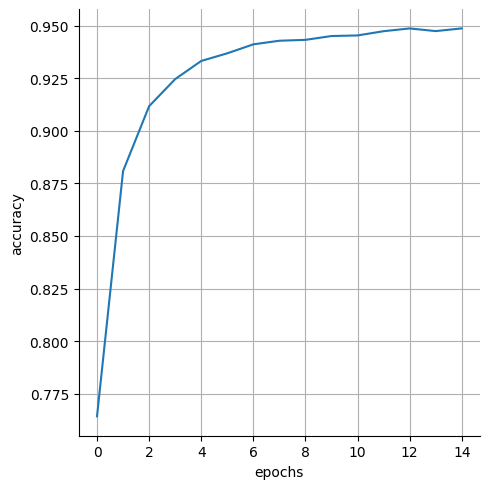

In [109]:
ax = sns.relplot(accuracy, kind='line')
ax.set(xlabel='epochs', ylabel='accuracy')
plt.grid()